In [1]:
import pandas as pd
import numpy as np

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
sns.set(rc = {'figure.figsize' : (9,6)})

In [8]:
events_data = pd.read_csv('C:\\Users\\fores\\Downloads\\event_data_train.csv')

In [65]:
submissions_data = pd.read_csv('C:\\Users\\fores\\Downloads\\submissions_data_train.csv')

In [70]:
submissions_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


In [9]:
events_data

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
...,...,...,...,...
3480698,33375,1526772685,viewed,11677
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198


In [10]:
events_data.action.unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [22]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit = 's')

In [67]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit = 's')

In [34]:
events_data = events_data.drop('data', axis = 1)

In [35]:
events_data.date.max()

Timestamp('2018-05-19 23:33:31')

In [36]:
events_data['day'] = events_data.date.dt.date

In [69]:
submissions_data['day'] = submissions_data.date.dt.date

In [37]:
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


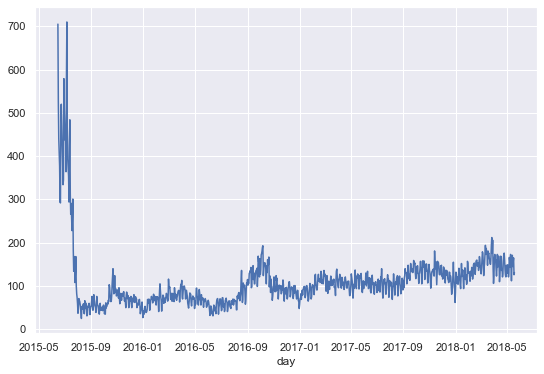

In [41]:
events_data.groupby('day')\
    .user_id.nunique().plot()

In [53]:
#events_data[events_data.action == 'passed']\
# .rename(columns={'step_id' : 'passed_step'})

,user_id,passed_step
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84
...,...,...
17257,26789,2
17258,26790,8
17259,26794,69
17260,26797,10


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000011505308D00>,
      dtype=object)

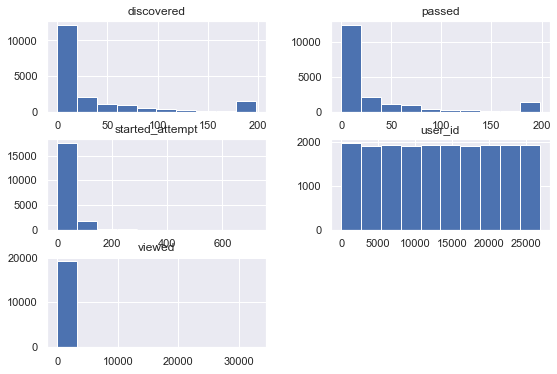

In [64]:
events_data.pivot_tablec

In [71]:
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15


In [189]:
qq = events_data.pivot_table(index = 'user_id', 
                        columns = 'action', 
                        values = 'step_id', 
                        aggfunc = 'count', 
                        fill_value = 0).reset_index()

In [117]:
users_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [90]:
gap_data = events_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset = ['user_id', 'day'])\
    .groupby('user_id')['timestamp'].apply(list)\
    .apply(np.diff).values

In [96]:
gap_data = pd.Series(np.hstack(gap_data))

In [100]:
gap_data = gap_data / (24*60*60)

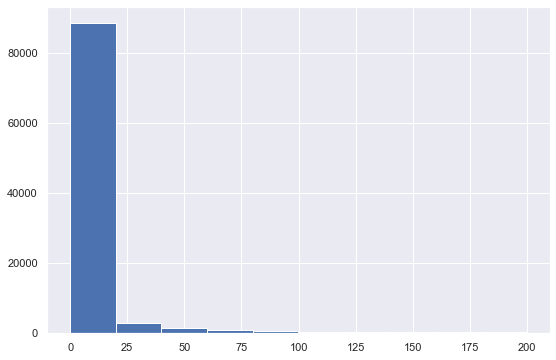

In [102]:
gap_data[gap_data < 200].hist()

In [109]:
gap_data.quantile(0.95)

59.760440972222156

In [133]:
users_scores['all'] = users_scores.correct + users_scores.wrong

In [134]:
users_scores

submission_status,user_id,correct,wrong,all
0,2,2,0,2
1,3,29,23,52
2,5,2,2,4
3,8,9,21,30
4,14,0,1,1
...,...,...,...,...
9935,26787,3,0,3
9936,26790,1,0,1
9937,26794,33,9,42
9938,26797,2,0,2


In [127]:
users_scores['success'] = users_scores.correct + int(users_scores.all)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'method'

In [143]:
users_scores['success'] = round(users_scores.correct / users_scores['all'] * 100, 2)

In [148]:
users_scores.sort_values('correct', ascending = False).head(30)

submission_status,user_id,correct,wrong,all,success
439,1046,421,513,934,45.07
2099,5552,186,93,279,66.67
6415,17135,168,177,345,48.70
2344,6183,142,65,207,68.60
3208,8461,135,42,177,76.27
515,1218,130,71,201,64.68
5508,14699,121,33,154,78.57
8895,24022,121,118,239,50.63
10,30,119,79,198,60.10
8410,22713,117,110,227,51.54


In [152]:
users_scores.head(50)

submission_status,user_id,correct,wrong,all,success
0,2,2,0,2,100.00
1,3,29,23,52,55.77
2,5,2,2,4,50.00
3,8,9,21,30,30.00
4,14,0,1,1,0.00
5,16,77,106,183,42.08
6,17,0,2,2,0.00
7,22,76,47,123,61.79
8,25,1,4,5,20.00
9,26,7,16,23,30.43


In [161]:
events_data.query('step_id == 158433').sort_values('date')

,step_id,timestamp,action,user_id,date,day
1780990,158433,1485263664,passed,1046,2017-01-24 13:14:24,2017-01-24
1780991,158433,1485263664,viewed,1046,2017-01-24 13:14:24,2017-01-24
1780992,158433,1485263664,discovered,1046,2017-01-24 13:14:24,2017-01-24
1781275,158433,1485271669,passed,3931,2017-01-24 15:27:49,2017-01-24
1781276,158433,1485271669,discovered,3931,2017-01-24 15:27:49,2017-01-24
...,...,...,...,...,...,...
3479620,158433,1526755659,passed,2058,2018-05-19 18:47:39,2018-05-19
3479621,158433,1526755659,viewed,2058,2018-05-19 18:47:39,2018-05-19
3479954,158433,1526759298,discovered,19410,2018-05-19 19:48:18,2018-05-19
3479953,158433,1526759298,passed,19410,2018-05-19 19:48:18,2018-05-19


In [163]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [170]:
users_data = events_data.groupby('user_id', as_index = False)\
    .agg({'timestamp' : 'max'}).rename(columns={'timestamp' : 'last_timestamp'})

In [179]:
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out

In [171]:
30 * 60 * 60 * 24

2592000

In [180]:
users_data

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True
...,...,...,...
19229,26790,1517495987,True
19230,26793,1510225034,True
19231,26794,1512035039,True
19232,26797,1509995096,True


In [176]:
now = 1526772811

In [178]:
drop_out = 2592000

In [181]:
users_data[users_data.is_gone_user == False]

,user_id,last_timestamp,is_gone_user
7,11,1526140625,False
14,24,1524764853,False
15,25,1524816605,False
20,32,1524752239,False
22,34,1525626844,False
...,...,...,...
19108,26619,1524331016,False
19140,26659,1526770439,False
19142,26661,1524570207,False
19149,26673,1526365733,False


In [185]:
users_data = users_data.merge(users_scores, on = 'user_id', how = 'outer')

In [186]:
users_data.fillna(0)

,user_id,last_timestamp,is_gone_user,correct,wrong,all,success
0,1,1472827464,True,0.0,0.0,0.0,0.00
1,2,1519226966,True,2.0,0.0,2.0,100.00
2,3,1444581588,True,29.0,23.0,52.0,55.77
3,5,1499859939,True,2.0,2.0,4.0,50.00
4,7,1521634660,True,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,1.0,100.00
19230,26793,1510225034,True,0.0,0.0,0.0,0.00
19231,26794,1512035039,True,33.0,9.0,42.0,78.57
19232,26797,1509995096,True,2.0,0.0,2.0,100.00


In [192]:
users_data.merge(qq, how = 'outer').fillna(0)

,user_id,last_timestamp,is_gone_user,correct,wrong,all,success,discovered,passed,started_attempt,viewed
0,1,1472827464,True,0.0,0.0,0.0,0.00,1,0,0,1
1,2,1519226966,True,2.0,0.0,2.0,100.00,9,9,2,10
2,3,1444581588,True,29.0,23.0,52.0,55.77,91,87,30,192
3,5,1499859939,True,2.0,2.0,4.0,50.00,11,11,4,12
4,7,1521634660,True,0.0,0.0,0.0,0.00,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,1.0,100.00,8,8,1,9
19230,26793,1510225034,True,0.0,0.0,0.0,0.00,1,0,1,1
19231,26794,1512035039,True,33.0,9.0,42.0,78.57,69,69,34,180
19232,26797,1509995096,True,2.0,0.0,2.0,100.00,10,10,2,13


In [205]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [206]:
users_days

,user_id,day
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
...,...,...
19229,26790,4
19230,26793,1
19231,26794,9
19232,26797,2


In [200]:
users_data = users_data.merge(users_days, how = 'outer')

In [203]:
users_data = users_data.fillna(0)

In [207]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,all,success,day
0,1,1472827464,True,0.0,0.0,0.0,0.00,1
1,2,1519226966,True,2.0,0.0,2.0,100.00,2
2,3,1444581588,True,29.0,23.0,52.0,55.77,7
3,5,1499859939,True,2.0,2.0,4.0,50.00,2
4,7,1521634660,True,0.0,0.0,0.0,0.00,1
...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,1.0,100.00,4
19230,26793,1510225034,True,0.0,0.0,0.0,0.00,1
19231,26794,1512035039,True,33.0,9.0,42.0,78.57,9
19232,26797,1509995096,True,2.0,0.0,2.0,100.00,2
